In [52]:
# Load Packages
library(ggplot2)
library(dplyr)
library(plyr)

In [3]:
# Load data 
filename <- "./data/Encode_HMM_data.txt"
data <- read.csv(filename, sep = '\t', header = FALSE)

In [4]:
# Examine Data 
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9
chr1,10000,10600,15_Repetitive/CNV,0,.,10000,10600,"245,245,245"
chr1,10600,11137,13_Heterochrom/lo,0,.,10600,11137,"245,245,245"
chr1,11137,11737,8_Insulator,0,.,11137,11737,"10,190,254"
chr1,11737,11937,11_Weak_Txn,0,.,11737,11937,"153,255,102"
chr1,11937,12137,7_Weak_Enhancer,0,.,11937,12137,"255,252,4"
chr1,12137,14537,11_Weak_Txn,0,.,12137,14537,"153,255,102"


In [5]:
# Rename the columns for visualization
names(data)[1:4] <- c("chrom", "start", "stop", "type")

In [6]:
# Take a look at dataset
head(data)

chrom,start,stop,type,V5,V6,V7,V8,V9
chr1,10000,10600,15_Repetitive/CNV,0,.,10000,10600,"245,245,245"
chr1,10600,11137,13_Heterochrom/lo,0,.,10600,11137,"245,245,245"
chr1,11137,11737,8_Insulator,0,.,11137,11737,"10,190,254"
chr1,11737,11937,11_Weak_Txn,0,.,11737,11937,"153,255,102"
chr1,11937,12137,7_Weak_Enhancer,0,.,11937,12137,"255,252,4"
chr1,12137,14537,11_Weak_Txn,0,.,12137,14537,"153,255,102"


## Create a Bar Plot

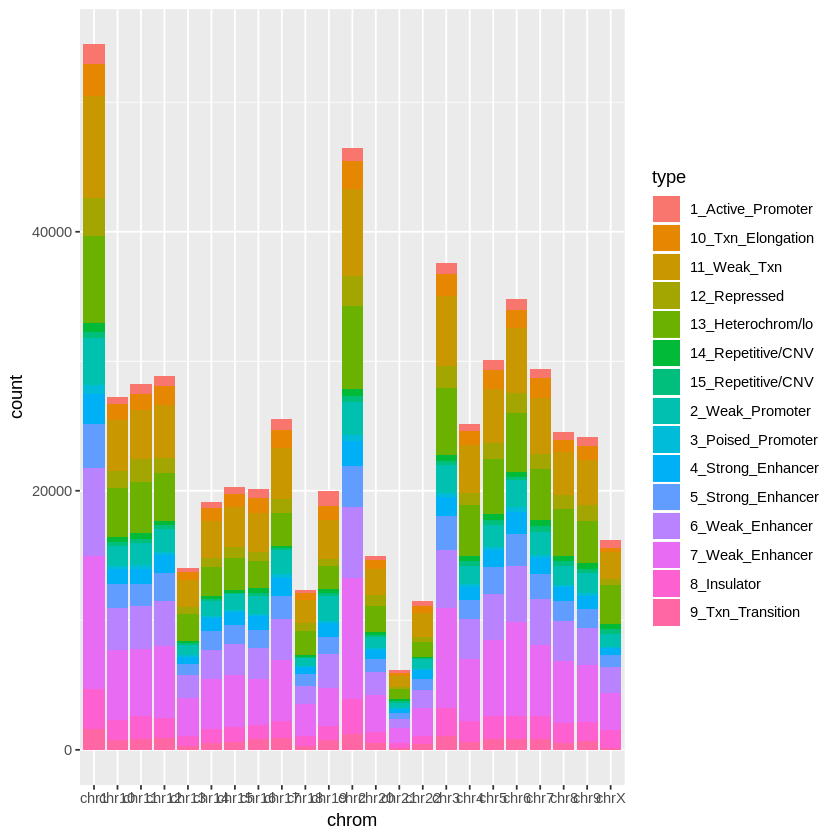

In [7]:
# Bar Plot 
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()

In [8]:
# Save plot in png format 
png("figs/plot.png")
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()
dev.off()

png 
  2

In [12]:
# Save plot in pdf format 
pdf("figs/plot.pdf")
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()
dev.off()

png 
  2

In [13]:
# Save plot in jpeg format 
jpeg("figs/plot.jpeg")
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()
dev.off()

png 
  2

In [14]:
# Save plot in tiff format 
tiff("figs/plot.tiff")
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()
dev.off()

png 
  2

In [15]:
# Save plot in png format in high resulation
png("figs/plot.png", 1000, 1000)
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()
dev.off()

png 
  2

## Basic Statistics

In [16]:
# Check data matrix 
dim(data)

[1] 571339      9

In [18]:
# Summary statistics 
summary(data)

     chrom            start                stop          
 chr1   : 54467   Min.   :        0   Min.   :    10200  
 chr2   : 46499   1st Qu.: 33424623   1st Qu.: 33427336  
 chr3   : 37617   Median : 66145965   Median : 66150096  
 chr6   : 34846   Mean   : 77800396   Mean   : 77805350  
 chr5   : 30071   3rd Qu.:114147254   3rd Qu.:114148704  
 chr7   : 29420   Max.   :249229377   Max.   :249232977  
 (Other):338419                                          
                type              V5    V6               V7           
 7_Weak_Enhancer  :109468   Min.   :0   .:571339   Min.   :        0  
 11_Weak_Txn      : 82312   1st Qu.:0              1st Qu.: 33424623  
 13_Heterochrom/lo: 75112   Median :0              Median : 66145965  
 6_Weak_Enhancer  : 69111   Mean   :0              Mean   : 77800396  
 5_Strong_Enhancer: 38604   3rd Qu.:0              3rd Qu.:114147254  
 2_Weak_Promoter  : 35065   Max.   :0              Max.   :249229377  
 (Other)          :161667              

In [19]:
# Data structure
str(data)

'data.frame':	571339 obs. of  9 variables:
 $ chrom: Factor w/ 23 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start: int  10000 10600 11137 11737 11937 12137 14537 20337 22137 22937 ...
 $ stop : int  10600 11137 11737 11937 12137 14537 20337 22137 22937 26937 ...
 $ type : Factor w/ 15 levels "1_Active_Promoter",..: 7 5 14 3 13 3 2 3 15 2 ...
 $ V5   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V6   : Factor w/ 1 level ".": 1 1 1 1 1 1 1 1 1 1 ...
 $ V7   : int  10000 10600 11137 11737 11937 12137 14537 20337 22137 22937 ...
 $ V8   : int  10600 11137 11737 11937 12137 14537 20337 22137 22937 26937 ...
 $ V9   : Factor w/ 10 levels "0,176,80","10,190,254",..: 6 6 2 4 10 4 1 4 1 1 ...


In [20]:
# Summary for chromosomes 
summary(data$chrom)

chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
54467 27263 28246 28863 14064 19133 20277 20113 25570 12324 19947 46499 15000 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX 
 6128 11497 37617 25155 30071 34846 29420 24506 24123 16210

In [21]:
# Summary for type 
summary(data$type)

1_Active_Promoter 10_Txn_Elongation       11_Weak_Txn      12_Repressed 
            15278             26509             82312             25483 
13_Heterochrom/lo 14_Repetitive/CNV 15_Repetitive/CNV   2_Weak_Promoter 
            75112              8028              6128             35065 
3_Poised_Promoter 4_Strong_Enhancer 5_Strong_Enhancer   6_Weak_Enhancer 
             5263             25486             38604             69111 
  7_Weak_Enhancer       8_Insulator  9_Txn_Transition 
           109468             33265             16227

In [22]:
# Summary for start position
summary(data$start)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0  33424623  66145965  77800396 114147254 249229377 

In [24]:
# Summary for stop position
summary(data$stop)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    10200  33427336  66150096  77805350 114148704 249232977 

In [25]:
# Create a new column is called size 
data$size = data$stop - data$start

In [26]:
# Now, take a look at dataset
head(data)

chrom,start,stop,type,V5,V6,V7,V8,V9,size
chr1,10000,10600,15_Repetitive/CNV,0,.,10000,10600,"245,245,245",600
chr1,10600,11137,13_Heterochrom/lo,0,.,10600,11137,"245,245,245",537
chr1,11137,11737,8_Insulator,0,.,11137,11737,"10,190,254",600
chr1,11737,11937,11_Weak_Txn,0,.,11737,11937,"153,255,102",200
chr1,11937,12137,7_Weak_Enhancer,0,.,11937,12137,"255,252,4",200
chr1,12137,14537,11_Weak_Txn,0,.,12137,14537,"153,255,102",2400


In [27]:
# Summary for size 
summary(data$size)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     400     800    4955    2400 1254800 

In [28]:
# Mean size 
mean(data$size)

[1] 4954.585

In [29]:
# Meadian size 
median(data$size)

[1] 800

In [30]:
# Standard deviation
sd(data$size)

[1] 21176.37

In [31]:
# Max size
max(data$size)

[1] 1254800

In [32]:
# Min size 
min(data$size)

[1] 1

## Customize Plot

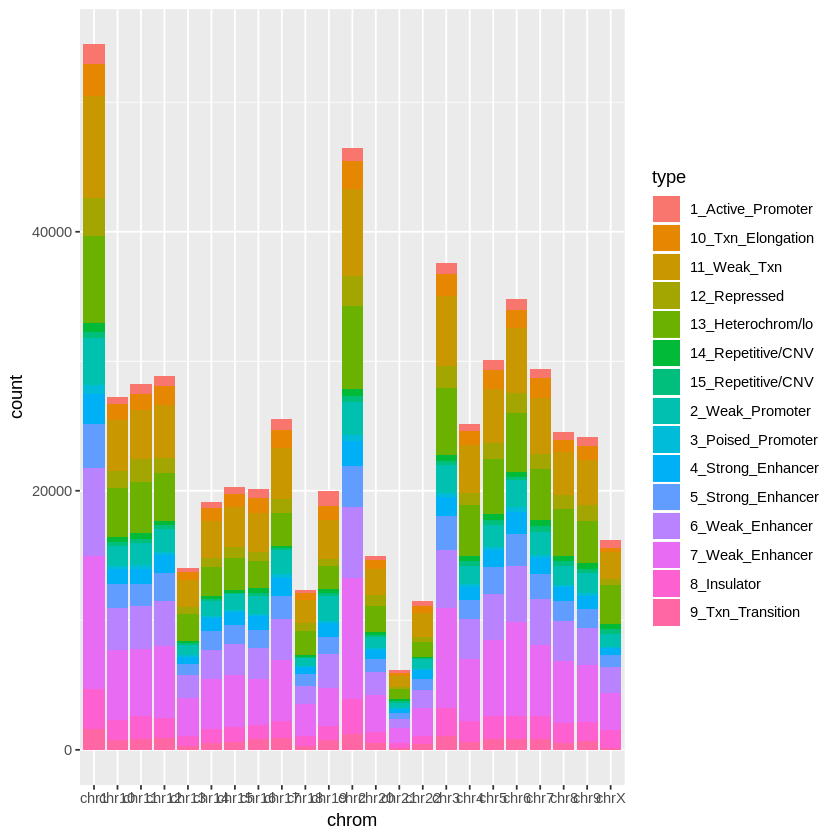

In [33]:
# Bar Plot 
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()

In [34]:
# Remove `chr` prefix 
data$chrom <- factor(gsub("chr", "", data$chrom))

In [37]:
# See the result with `chr` removed 
summary(data$chrom)

1    10    11    12    13    14    15    16    17    18    19     2    20 
54467 27263 28246 28863 14064 19133 20277 20113 25570 12324 19947 46499 15000 
   21    22     3     4     5     6     7     8     9     X 
 6128 11497 37617 25155 30071 34846 29420 24506 24123 16210

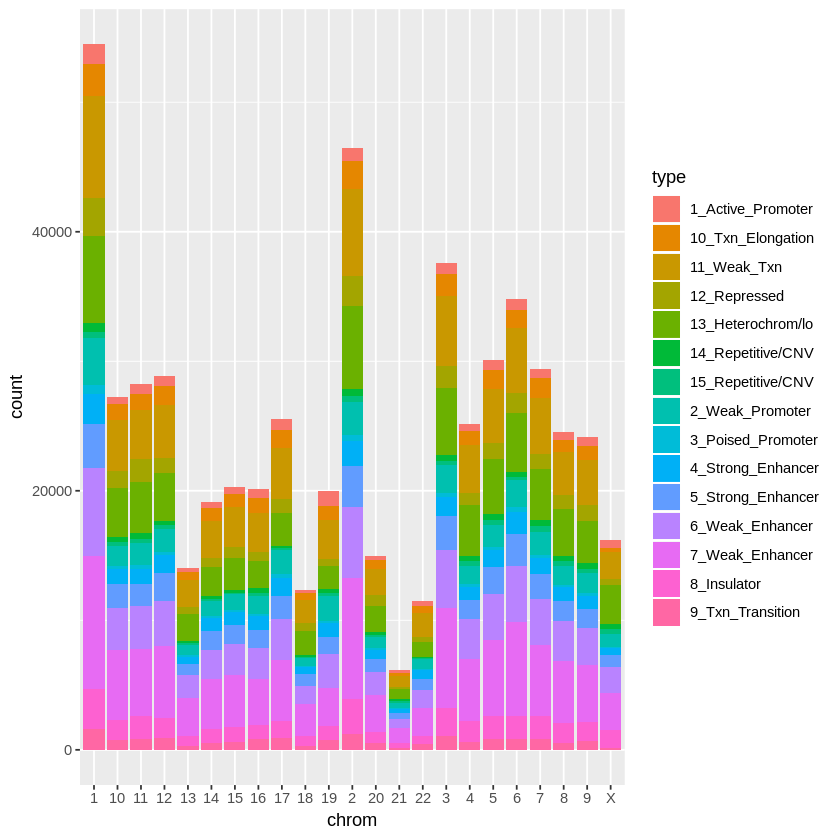

In [38]:
# Now plot the data 
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()

In [42]:
# Reorder the chromosomes numerically
data$chrom <- factor(data$chrom, levels = c(seq(1,22), "X", "Y"))

In [43]:
# See the ordered chromosomes 
summary(data$chrom)

1     2     3     4     5     6     7     8     9    10    11    12    13 
54467 46499 37617 25155 30071 34846 29420 24506 24123 27263 28246 28863 14064 
   14    15    16    17    18    19    20    21    22     X     Y 
19133 20277 20113 25570 12324 19947 15000  6128 11497 16210     0

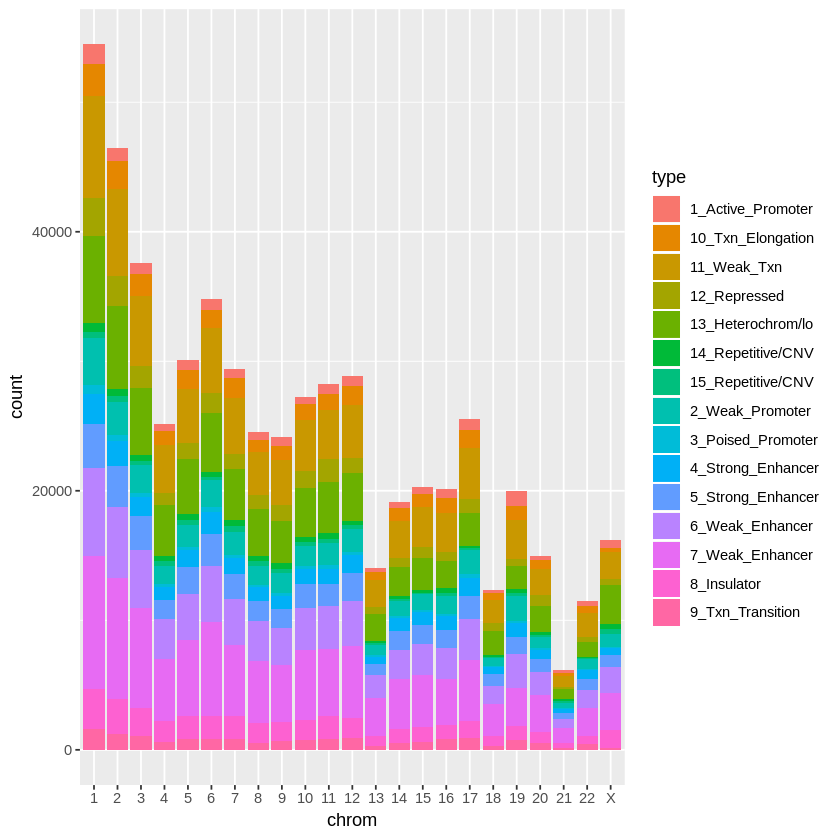

In [44]:
# Ordering
ggplot(data, aes(x=chrom, fill=type))+
    geom_bar()

In [57]:
data$type <- revalue(data$type, c("1_Active_Promoter"="Promoter", "4_Strong_Enhancer"="Enhancer", "8_Insulator"="Insulator"))

The following `from` values were not present in `x`: 1_Active_Promoter, 4_Strong_Enhancer, 8_Insulator


In [56]:
data 

chrom,start,stop,type,V5,V6,V7,V8,V9,size
1,10000,10600,15_Repetitive/CNV,0,.,10000,10600,"245,245,245",600
1,10600,11137,13_Heterochrom/lo,0,.,10600,11137,"245,245,245",537
1,11137,11737,Insulator,0,.,11137,11737,"10,190,254",600
1,11737,11937,11_Weak_Txn,0,.,11737,11937,"153,255,102",200
1,11937,12137,7_Weak_Enhancer,0,.,11937,12137,"255,252,4",200
1,12137,14537,11_Weak_Txn,0,.,12137,14537,"153,255,102",2400
1,14537,20337,10_Txn_Elongation,0,.,14537,20337,"0,176,80",5800
1,20337,22137,11_Weak_Txn,0,.,20337,22137,"153,255,102",1800
1,22137,22937,9_Txn_Transition,0,.,22137,22937,"0,176,80",800
1,22937,26937,10_Txn_Elongation,0,.,22937,26937,"0,176,80",4000
